In [1]:
import pandas as pd     
import numpy as np  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

In [18]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

In [7]:
pd.options.display.max_colwidth=300

In [4]:
data = pd.read_csv('data/processed/processed_data.csv')

In [8]:
data.head(20)

,tweet_text,tweet_length,tweet_likes,tweet_retweets
0,Wonder know would Fuller take action,128,0,0
1,China doesnxe2x80x99t need raise sweat buy everything,99,0,0
2,Wants keep poll e.g. leader wartime popularity rise xf0x9fxa4xac,103,0,0
3,"Pt10),,,,,,,xe2x80xa6",126,0,0
4,n nYou guy going investigate,102,0,0
5,Now rest world Looking,93,0,0
6,He didnt speak tongue event would interexe2x80xa6,140,0,0
7,Why would victim thxe2x80xa6,140,0,0
8,xe2x80x9caUsTRaLiA US aRE gOod mAtEsxe2x80x9d nnGet new line ya fucken nerd.,96,0,0
9,"So agree social restriction movement And, asking mexe2x80xa6",139,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43553 entries, 0 to 43552
Data columns (total 4 columns):
tweet_text        43539 non-null object
tweet_length      43553 non-null int64
tweet_likes       43553 non-null int64
tweet_retweets    43553 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [187]:
blobber = Blobber(analyzer=NaiveBayesAnalyzer())

def sent(text):
    blob = blobber(text)
    return blob.sentiment.polarity


In [19]:
data['polarity'] = np.array([ TextBlob(str(tweet)).sentiment.polarity for tweet in data['tweet_text']])

In [22]:
data['subjectivity'] = np.array([ TextBlob(str(tweet)).sentiment.subjectivity for tweet in data['tweet_text']])

In [95]:
data.head(20)

,tweet_text,tweet_length,tweet_likes,tweet_retweets,polarity,subjectivity,sentiment
0,Wonder know would Fuller take action,128,0,0,0.100000,0.100000,1
1,China doesnxe2x80x99t need raise sweat buy everything,99,0,0,0.000000,0.000000,0
2,Wants keep poll e.g. leader wartime popularity rise xf0x9fxa4xac,103,0,0,0.200000,0.100000,1
3,"Pt10),,,,,,,xe2x80xa6",126,0,0,0.000000,0.000000,0
4,n nYou guy going investigate,102,0,0,0.000000,0.000000,0
5,Now rest world Looking,93,0,0,0.000000,0.000000,0
6,He didnt speak tongue event would interexe2x80xa6,140,0,0,0.000000,0.000000,0
7,Why would victim thxe2x80xa6,140,0,0,-0.075000,0.050000,-1
8,xe2x80x9caUsTRaLiA US aRE gOod mAtEsxe2x80x9d nnGet new line ya fucken nerd.,96,0,0,0.418182,0.527273,1
9,"So agree social restriction movement And, asking mexe2x80xa6",139,0,0,0.033333,0.066667,1


In [106]:
data.describe()

,tweet_length,tweet_likes,tweet_retweets,polarity,subjectivity,sentiment
count,43553.000000,43553.000000,43553.000000,43553.000000,43553.000000,43553.000000
mean,120.527266,6.402751,1.504948,0.056275,0.286362,0.143825
std,29.410849,326.044853,39.228563,0.280510,0.332789,0.670524
min,9.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,139.000000,0.000000,0.000000,0.000000,0.100000,0.000000
75%,140.000000,2.000000,0.000000,0.125000,0.535714,1.000000
max,155.000000,65984.000000,7455.000000,1.000000,1.000000,1.000000


In [94]:
data.corr()

,tweet_length,tweet_likes,tweet_retweets,polarity,subjectivity,sentiment
tweet_length,1.000000,0.006589,0.017568,-0.033153,0.045822,-0.000429
tweet_likes,0.006589,1.000000,0.965436,0.000934,-0.000276,-0.000264
tweet_retweets,0.017568,0.965436,1.000000,0.000018,-0.001185,-0.000879
polarity,-0.033153,0.000934,0.000018,1.000000,0.164515,0.811758
subjectivity,0.045822,-0.000276,-0.001185,0.164515,1.000000,0.143641
sentiment,-0.000429,-0.000264,-0.000879,0.811758,0.143641,1.000000


Text(0.5,1,'data correlations')

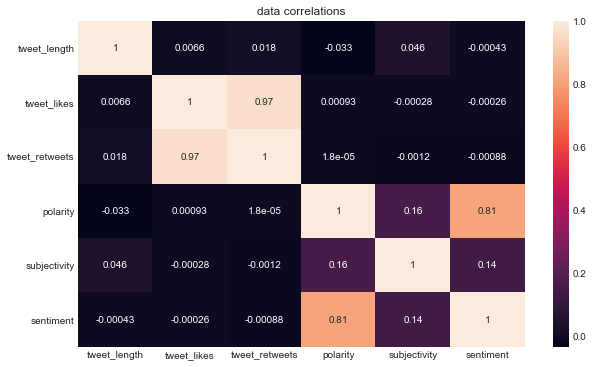

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.title('data correlations')

C:\Users\Hasitha Kalindu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


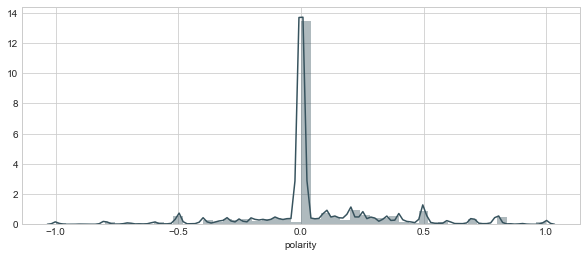

In [113]:
plt.figure(figsize=(10,4))
sns.distplot(data['polarity'])

In [103]:
data.isnull().sum()

tweet_text        14
tweet_length       0
tweet_likes        0
tweet_retweets     0
polarity           0
subjectivity       0
sentiment          0
dtype: int64

C:\Users\Hasitha Kalindu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


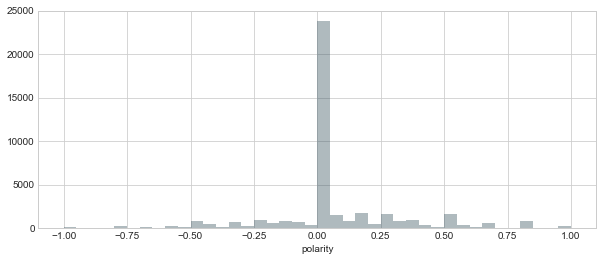

In [134]:
plt.figure(figsize=(10,4))
sns.distplot(data['polarity'].dropna(), kde=False, bins=40)

C:\Users\Hasitha Kalindu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


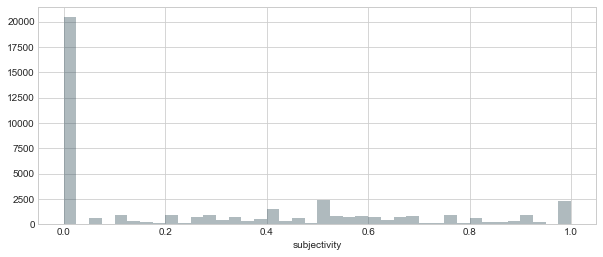

In [132]:
plt.figure(figsize=(10,4))
sns.distplot(data['subjectivity'].dropna(), kde=False, bins=40)

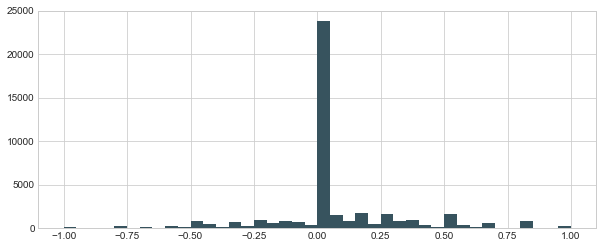

In [116]:
data['polarity'].hist(bins=40, figsize=(10,4))

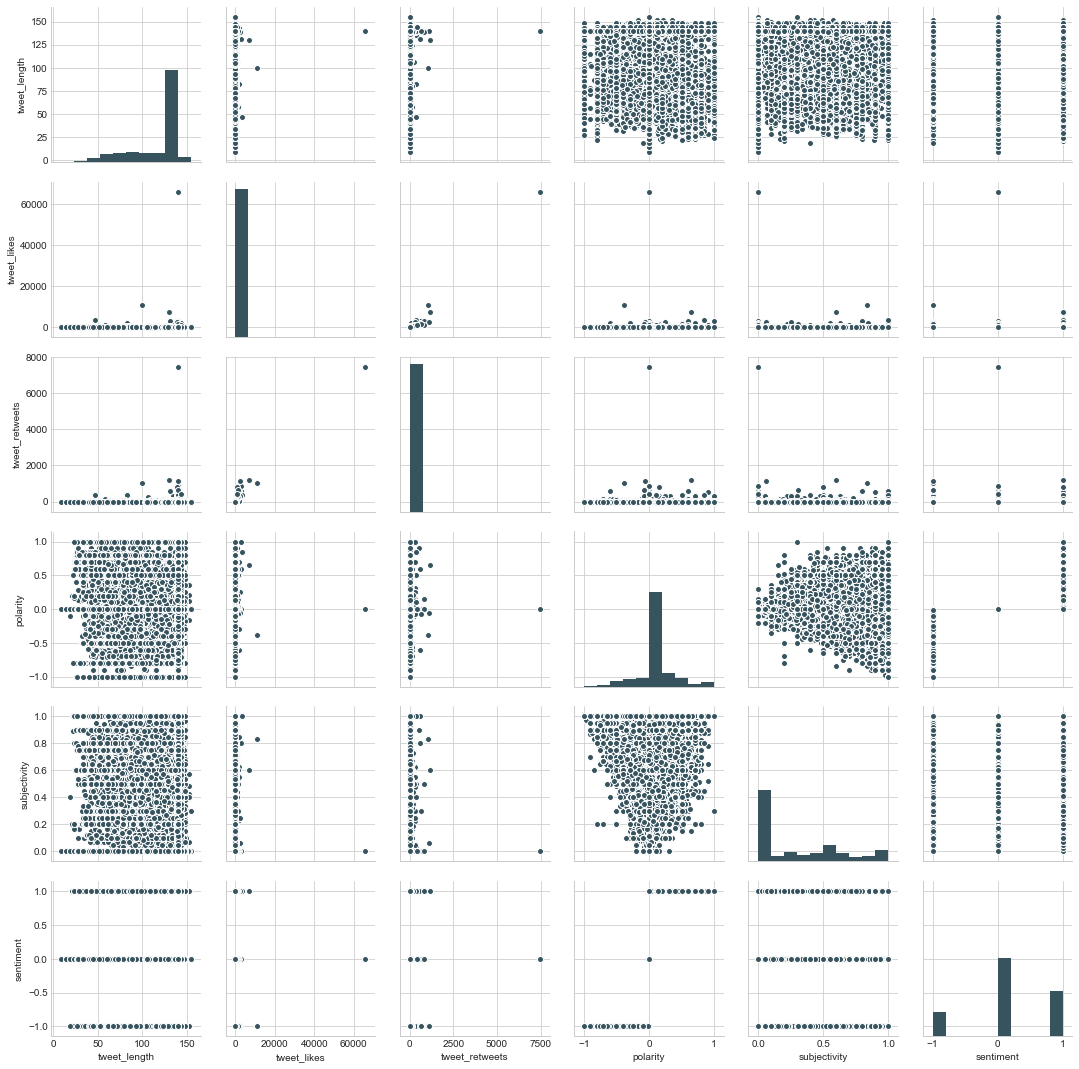

In [92]:
sns.pairplot(data)

C:\Users\Hasitha Kalindu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hasitha Kalindu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


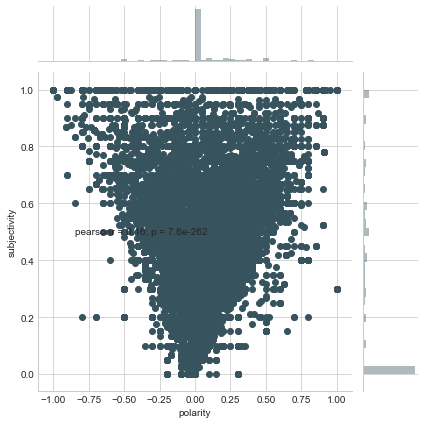

In [117]:
sns.jointplot(x='polarity',y='subjectivity',data=data,kind='scatter')

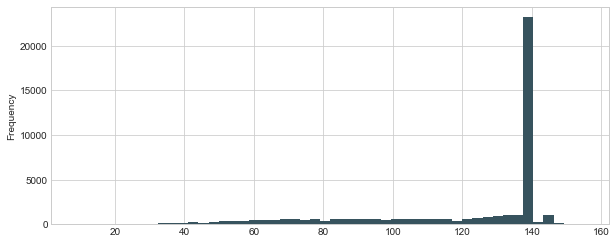

In [118]:
data['tweet_length'].plot(bins=50, kind='hist',figsize=(10,4)) 

In [ ]:
np.array([ TextBlob(str(tweet)).sentiment.subjectivity for tweet in data['tweet_text']])

In [71]:
def select_sentiment(value):
    
    if value>0:
        return 1
    elif value==0:
        return 0
    else:
        return -1

In [76]:
data['sentiment'] = np.array([select_sentiment(p) for p in data['polarity']])

## countplot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

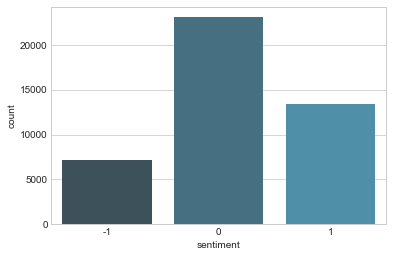

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=data)

## barplot 
These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

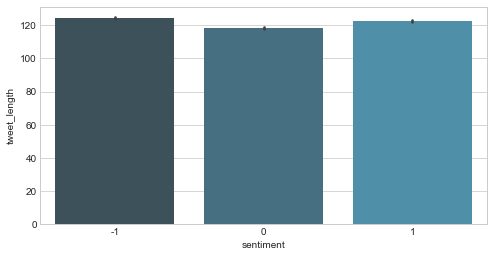

In [137]:
plt.figure(figsize=(8,4))
sns.barplot(x='sentiment',y='tweet_length',data=data)

## boxplots
boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

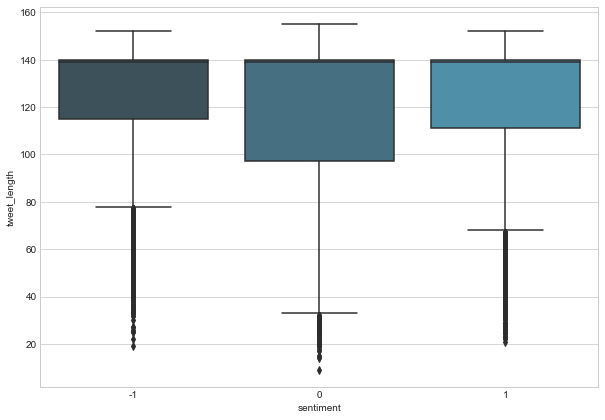

In [123]:
plt.figure(figsize=(10,7))
sns.boxplot(x="sentiment", y="tweet_length", data=data)

## Sentimental analysis

In [ ]:
#### pie chart

In [138]:
pos_tweets= [ tweet for index, tweet in enumerate(data['sentiment']) if data['sentiment'][index] == 1]
nue_tweets= [ tweet for index, tweet in enumerate(data['sentiment']) if data['sentiment'][index] == 0]
neg_tweets= [ tweet for index, tweet in enumerate(data['sentiment']) if data['sentiment'][index] == -1]

pos_percentage = len(pos_tweets)*100/len(data)
nue_percentage = len(nue_tweets)*100/len(data)
neg_percentage = len(neg_tweets)*100/len(data)


In [139]:
print(pos_percentage)
print(nue_percentage)
print(neg_percentage)

30.705117902325902
52.972240718205406
16.322641379468692


In [277]:
sns.set_palette("Paired")

<Figure size 432x288 with 0 Axes>

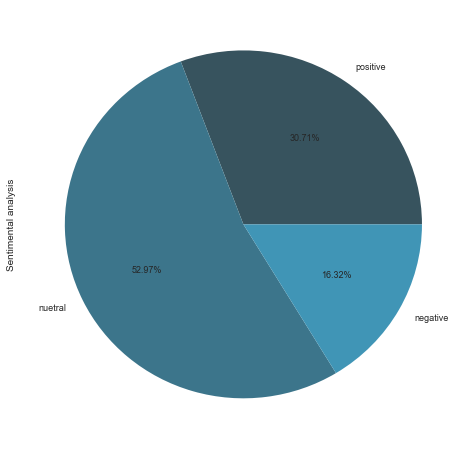

<Figure size 432x288 with 0 Axes>

In [148]:
fig = plt.figure()
percentage = pd.Series([pos_percentage,nue_percentage,neg_percentage], 
                      index=['positive','nuetral','negative'], 
                      name='Sentimental analysis')
percentage.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(8,8));
plt.figure()
#fig.savefig('Hasitha_Graphs/figure2.png', bbox_inches='tight')

# Unwanted

In [21]:
def sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    blob.sentiment

In [ ]:
data['sentiment'] = np.array([ sentiment(tweet) for tweet in data['tweet_text']])

In [ ]:
data['sentiment'].head()

In [20]:
blob = TextBlob("I know this library")
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)